In [3]:
# Zarur kutubxonalarni chaqiramiz
import numpy as np                      # Massivlar (arraylar) bilan ishlash uchun
import matplotlib.pyplot as plt         # Grafik chizish uchun
from sklearn.svm import SVR             # SVR modelini olish uchun
from sklearn.datasets import make_regression  # Sun'iy regressiya ma'lumotlari yaratish uchun
from sklearn.preprocessing import StandardScaler  # Ma'lumotni standartlashtirish (scaling) uchun
from sklearn.pipeline import make_pipeline       # Preprocessing + modelni bitta pipeline’da yig‘ish uchun

In [5]:
# Sun’iy regressiya uchun ma’lumotlar yaratamiz
X, y = make_regression(n_samples=100,  # 100 ta namunaviy ma'lumot
                       n_features=1,   # Bitta mustaqil o'zgaruvchi (x)
                       noise=10,       # Biroz shovqin qo‘shamiz
                       random_state=42)  # Qayta tiklanadigan (reproducible) bo‘lishi uchun


In [7]:
# SVR modelini yaratamiz:
# Pipeline ichida:
# 1) Ma’lumotlarni StandartScaler bilan standartlashtiramiz (0 atrofida markazlashtirib, 1 ga normallashtiramiz)
# 2) SVR modelini qo‘llaymiz — RBF kernel yordamida
svr_model = make_pipeline(
    StandardScaler(),         # Scaling: SVR uchun bu juda muhim, chunki u masofaga sezgir
    SVR(kernel='rbf',         # RBF yadro — chiziqli bo'lmagan (non-linear) aloqa uchun ishlatiladi
        C=100,                # Model qanchalik xatolikka bardoshli bo'lishini belgilaydi
        epsilon=5)            # Qabul qilinadigan xatolik diapazoni (ε-tube)
)

In [9]:
# Modelni o‘qitamiz (fit qilamiz)
svr_model.fit(X, y)  # X — x o'zgaruvchi, y — bashorat qilinadigan qiymat (target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, epsilon=5))])

In [11]:
# Model orqali bashorat (prediction) qilamiz
y_pred = svr_model.predict(X)  # X dagi qiymatlar uchun model qanday bashorat beradi?

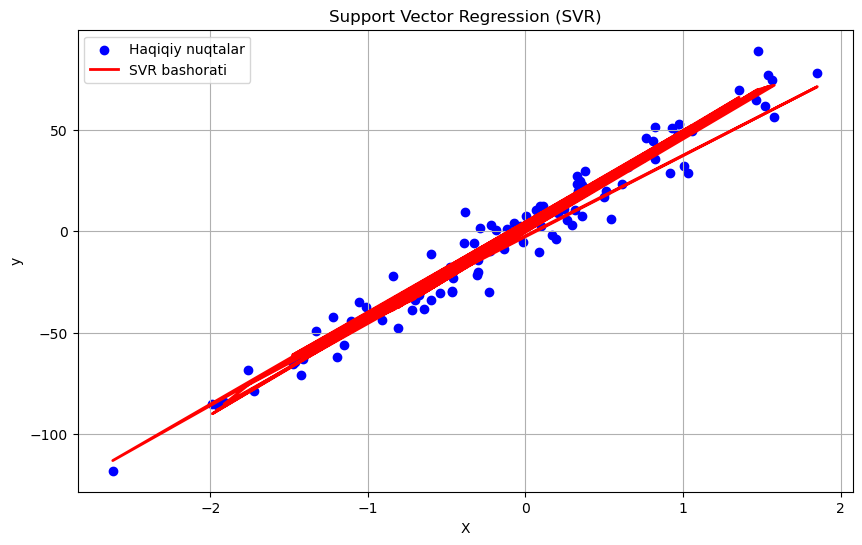

In [13]:
# Natijalarni grafik ko‘rinishda chizamiz
plt.figure(figsize=(10,6))                 # Grafik o‘lchamini sozlaymiz
plt.scatter(X, y, color='blue', label='Haqiqiy nuqtalar')   # Asl ma’lumotlar (scatter plot)
plt.plot(X, y_pred, color='red', linewidth=2, label='SVR bashorati')  # Model bashorati (qizil chiziq)
plt.title('Support Vector Regression (SVR)')  # Grafik sarlavhasi
plt.xlabel('X')                     # X o‘qi nomi
plt.ylabel('y')                     # Y o‘qi nomi
plt.legend()                        # Qanday chiziq nimani anglatishini ko‘rsatish
plt.grid(True)                      # Fon grid chizish
plt.show()                          # Grafikni ko‘rsatish


In [21]:
# CSV faylni o'qish (sizning ko‘rsatgan yo‘lingiz bilan)
df = pd.read_csv("C:/Users/user/Desktop/Data.csv")

In [23]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [49]:
#  Ma’lumotlarni tanlab olish
# Masalan: 'Clump Thickness' ustuni orqali 'Class' ustunini bashorat qilamiz
X = df[['Clump Thickness']].values  # X — mustaqil o‘zgaruvchi (2D shaklda bo'lishi kerak)
y = df['Class'].values              # y — bashorat qilinadigan maqsadli ustun (target)

In [51]:
#  SVR modelini yaratish va o'qitish
# Pipeline ichida: StandartScaler -> SVR
svr_model = make_pipeline(
    StandardScaler(),               # Ma’lumotni standartlashtirish (0 o‘rtacha, 1 dispersiya)
    SVR(kernel='rbf',               # RBF kernel — egri regressiya uchun yaxshi ishlaydi
        C=100,                      # Modelga xatoga nisbatan sezuvchanlik
        epsilon=0.1)                # Bashoratdagi ruxsat etilgan xatolik oraliq (ε-tube)
)

In [53]:
# Modelni o‘qitish (trening qilish)
svr_model.fit(X, y)  # Model X orqali y ni bashorat qilishni o‘rganadi

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=100))])

In [55]:
#  Bashorat (prediction) qilish
y_pred = svr_model.predict(X)

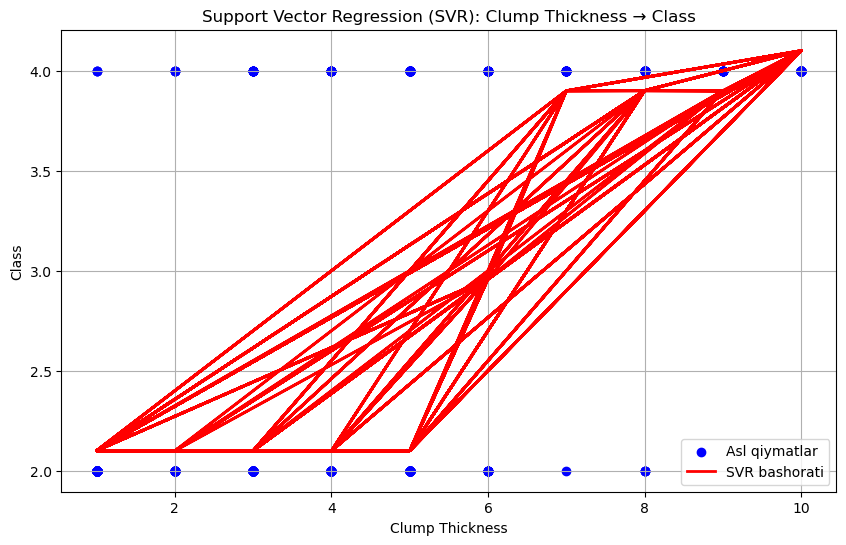

In [57]:
# Grafik chizish
plt.figure(figsize=(10, 6))                             # Grafik o‘lchami
plt.scatter(X, y, color='blue', label='Asl qiymatlar')  # Asl nuqtalarni chizish
plt.plot(X, y_pred, color='red', linewidth=2, label='SVR bashorati')  # Bashorat qilingan chiziq
plt.title("Support Vector Regression (SVR): Clump Thickness → Class")
plt.xlabel("Clump Thickness")     # X o‘qi nomi
plt.ylabel("Class")               # Y o‘qi nomi
plt.legend()                      # Ko‘rsatkichlar
plt.grid(True)                    # Fon grid
plt.show()                        # Grafikni ko‘rsatish